In [ ]:

import numpy as np
from pathlib import Path
# from AOTaccess.stimulus_info_access import StimuliInfoAccess
# from AOTaccess.glmsingle_access import GLMSingleAccess
from AOTanalysis.bandedRR.construct_features import (
    construct_features_motion_energy,
    construct_features_sbert_embeddings,
)

from AOTanalysis.bandedRR.construct_target import (
    construct_target_data_split_flatten_masked,
)

from AOTanalysis.bandedRR.utils import (
    reshape_from_flatten_masked_to_wholebrain,
)

import joblib
from pprint import pprint
import numpy as np

from pathlib import Path

In [1]:
# pyramid.show_filter(2161)
from moten import (
    pyramids,
    utils,
    core,
    viz,
    io,
)
import moten

# sample_video_file = (
#     "/tank/shared/2024/visual/AOT/derivatives/stimuli/rescaled_final/0001_fw.mp4"
# )

sample_video_file = "/Users/shufanzhang/AOT_stimuli/rescaled_final/0001_fw.mp4"

luminance_images = moten.io.video2luminance(sample_video_file)
spatial_frequencies = [0, 2, 4, 8, 16, 32]

# Create a pyramid of spatio-temporal gabor filters
nimages, vdim, hdim = luminance_images.shape
print(nimages, vdim, hdim)
pyramid = moten.get_default_pyramid(
    vhsize=(vdim, hdim), fps=24, spatial_frequencies=spatial_frequencies
)

moten.io.video2luminance: 60it [00:40,  1.47it/s]


60 1080 1920


In [5]:
print(pyramid)

<moten.pyramids.MotionEnergyPyramid [#11845 filters (ntfq=3, nsfq=6, ndirs=8) aspect=1.778]>


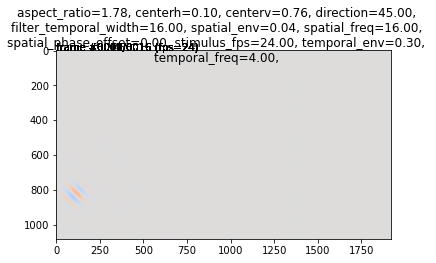

In [9]:
example_index = 1000
pyramid.show_filter(example_index)

In [10]:
example_filter = pyramid.filters[example_index]
print(example_filter['centerv'], example_filter['centerh'])

0.7625 0.10138888888888875


In [ ]:
#https://gallantlab.org/pymoten/auto_examples/introduction/index.html

''' things to compare
position with prf
spacial fweq with eccentricity
temporal freq with ecc 
'''



"""" the way we treat filter for each voxel
1. get the filter that predict each voxel maximum with 
2. cal some average of the filter for each voxel
"""""



"""the way we get the betas from BRR fittings
1.get from one hot input(the way we deal with teh standard scaler:add negative one hot input foe each filter?)
2.try some other model to fit (some simple model with directly get the betas)
"""
